Реализуем нашу логистическую регрессию.
Для начала импортируем все нужные библиотеки, в частности sklearn с данными.


```Python
import numpy as np 
from numpy import log,dot,e,shape
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split  
```



Создадим датасет, разобьем его на тестовую и тренировочную части.


```python
X,y = make_classification(n_features = 4,n_classes=2)
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.1)
```



Теперь следует стандартизировать данные, ведь для некоторых моделей наличие нескольких фич сильно разной размерности, диапозона и единиц измерения является препятствием.
Математически стандартизация будет реализована так: (x-μ)/σ.


```python
def standardize(self, X_tr):
  for i in range(shape(X_tr)[1]):
      X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])
```


---
По сути мы делаем математическое ожидание аттрибута равным нулю и распределение имеет стандартное отклонение, равное нулю.



Инициализируем параметры, добавив в каждое наблюдение единичный bias. Bias важен, ведь он поможет сделать модель более гибкой.


```python
def initialize (self,X):
      weights = np.zeros((shape(X)[1]+1,1))
      X = np.c_[np.ones((shape(X)[0],1)),X]
      return weights,X
```



Модель логистической регрессии схожа с моделью линейной регрессии, ведь процесс создания предсказаний практически идентичен, за исключением того, что в логистической регресси к слою выхода применяется функция активации.
Реализуем сигмоиду.
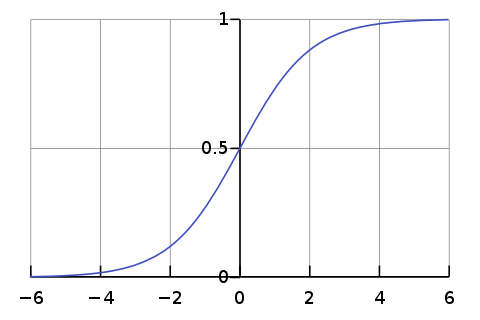
Как можно заметить функция сигмоиды пересекает ось ординат в точке 0.5. Наше классификация будет считать, что если sigmoid(x)>0.5, то x∈FirstClass, иначе x∈SecondClass

Функция сигмоиды: sigmoid(x)= 1/(1+e^{-x}


```python
def sigmoid(self,x):
    sigmoid = 1/(1+e**(-x))
    return sigmoid
```



Функция потерь

Наша модель интепретирует скалярное произведение векторов $ w^Tx$ как вероятность, используя $sigmoid(x)$. Значит наше предсказание можно представлять как $ \^y= P(y=1 |x  )$ 

Другой способ выразить то же самое выглядит так: 
* Если $y=1$:   $P(y| x)= \^y$ 
* Если $y=0$:   $P(y| x) = 1 - \^y$

Тогда давайте объединим два этих выражения : $ P(y| x)=\^y^y(1-\^y)^{1-y}$
Так как функция логарифма монотонно растет с ростом аргумента, максимизировав $log(P(y| x))$ мы максимизируем и $P(y| x)$. 

$f(\^y,y)=logP(y|x)=y*log\^y + (1-y)*log(1-\^y)$

Но так как функционал ошибок мы хотим минимизировать, то функция потерь будет равна $-f(\^y,y)$ (minimazing the cost function == maximazing the log of the probability)

Интуитивно, мы хотели бы назначать модели штраф за предсказание 1, когда на самом деле ответ 0, и наоборот. Функция потерь логистической регрессии так и делает. 

$Cost(h_\theta(x), y) = \begin{cases}
      -log(h_\theta(x)) \rightarrow if \quad y=1 \\
      -log(1-h_\theta(x)) \rightarrow if \quad y=0
    \end{cases}\,.$

Однако же мы можем переписать эту системы в одну строчку для будущих вычислений: 

$Cost(h_\theta(x),y) =-ylog(h_\theta(x))-(1-y)log(h_\theta(x)) $    

Наша функция потерь будет выглядеть следующим образом:

$J(w)= -\frac{1}{m} (y^T*log(h(Xw))+(1-y)^T*log(1-h(Xw)))$

↿h(x) - sigmoid function↾


```Python
def cost(theta):
    prediction = X@theta 
    cost = -(y.T@log(self.sigmoid(prediction)) + (1-y).T@log(1-self.sigmoid(prediction)))/len(y)
    return cost
```



Реализуем градиентный спуск:
* Продифференцируем функцию потерь :
$$
\frac{\partial{L}}{\partial{w}}
= \left(-\frac{y}{y_{pred}} + \frac{1-y}{1-y_{pred}}\right)\frac{\partial{y_{pred}}}{\partial{w}}
$$

$$
\frac{\partial{y_{pred}}}{\partial{w}} = \frac{1}{(1+e^{-\langle x, w \rangle})^2} e^{-\langle x, w \rangle} (-x) = -y_{pred}(1-y_{pred})x
$$

$$
\frac{\partial{L}}{\partial{w}} = (y_{pred} - y) x
$$

* 
```python
def fit(self,X,y,alpha=0.001,iter=400):
        weights,X = self.initialize(X)
        def cost(theta):
            z = dot(X,theta)
            cost = -((1-y).T@(log(1-self.sigmoid(z))) +  y.T@log(self.sigmoid(z)))/len(y)
            return cost
        cost_list = np.zeros(iter,)
        for i in range(iter):
            z = sigmoid(logit(X_train, self.w))
            grad = np.dot(X_train.T, (z - y)) / len(y)

            weights -= grad * lr
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list
```



Предсказания модели:


```python
def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis
```



Давайте соберем вcе вместе.

In [3]:
import numpy as np 
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
X,y = make_classification(n_features=4)
from sklearn.model_selection import train_test_split
random_seed =3407
np.random.seed(random_seed) 
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.1)
                                       
def standartize(Matrice):
    for i in range(shape(Matrice)[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])
def F1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score
class LogidticRegression:
    def sigmoid(self,z):
        sig = 1/(1+exp(-z))
        return sig
    def initialize(self,X):
        weights = np.zeros((shape(X)[1]+1,1))
        X = np.c_[np.ones((shape(X)[0],1)),X]
        return weights,X
    def fit(self,X,y,alpha=0.001,iter=400):
        weights,X = self.initialize(X)
        def cost(theta):
            z = dot(X,theta)
            cost = -((1-y).T@(log(1-self.sigmoid(z))) +  y.T@log(self.sigmoid(z)))/len(y)
            return cost
        cost_list = np.zeros(iter,)
        for i in range(iter):
            weights = weights - alpha*dot(X.T,self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1)))
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list
    def predict(self,X):
        z = dot(self.initialize(X)[1],self.weights)
        lis = []
        for i in self.sigmoid(z):
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis
standartize(X_tr)
standartize(X_te)
obj1 = LogidticRegression()
model= obj1.fit(X_tr,y_tr)
y_pred = obj1.predict(X_te)
y_train = obj1.predict(X_tr)

Давайте взглянем на результаты нашей модели с помощью f1:

$ F1 = 2 * \frac{precision*recall}{precision+recall}$

Точность(precision) и полнота(recall) являются метриками, которые используются при оценке большей части алгоритмов извлечения информации. Иногда они используются сами по себе, иногда в качестве базиса для производных метрик, таких как F-мера или R-Precision. Суть точности и полноты очень проста.

Точность системы в пределах класса – это доля документов действительно принадлежащих данному классу относительно всех документов которые система отнесла к этому классу. Полнота системы – это доля найденных классфикатором документов принадлежащих классу относительно всех документов этого класса в тестовой выборке.

In [5]:
f1_score_tr = F1_score(y_tr,y_train)
f1_score_te = F1_score(y_te,y_pred)
print(f1_score_tr)
print(f1_score_te)

0.9411764705882352
0.923076923076923
